In [13]:
from ipywidgets import widgets
from IPython.display import display
text= widgets.Text(description="Please enter topic")
display(text)
button=widgets.Button(description="Search")
display(button)
def clicked(b):
    file=open(r'input.txt','w')
    file.write(text.value)
    file.close()
    print(text.value)
button.on_click(clicked)


#test


In [6]:
input <- readChar("input.txt", file.info("input.txt")$size)
print(input)

[1] "#test"


In [2]:
install.packages("twitteR") 
library(twitteR)
setup_twitter_oauth("BTMy29ZZHUFi7z7I9prLntB5z", "vBsjJdgVcJz6nLwzLicejhf31JvbPAkPnKMgfXnEDrZNVH9d9P", "831555967250812928-NRxwY6dlGRhf4gbz89NEZ3UMxx8Ojgq", "nDTOXPHJ5gZxirEonPao10IT1Ua8exzxOpddy4vIm7KNk")
input <- "#SuperBowl"
tweets <- searchTwitter(input, n=10000) 
#tweets <- searchTwitter(input, n=10000) for widget input
length(tweets)
df <- twListToDF(tweets)


[1] "Using direct authentication"
[1] "Rate limited .... blocking for a minute and retrying up to 119 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 118 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 117 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 116 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 115 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 114 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 113 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 112 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 111 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 110 times ..."


[1] 10000

In [3]:
user <- lookupUsers(df$screenName) 


[1] 7995

In [4]:
userdf <- twListToDF(user) 

In [11]:
userdf <- userdf[!(userdf$location == "" | is.na(userdf$location)), ]
#write.csv(userdf,"usernew.csv")

In [31]:
locationdf <- userdf[, c(12)]
#write.csv(locationdf,"location.csv")
NROW(locationdf)

[1] 4781

In [10]:
locationdf <- read.csv("location.csv",header=TRUE)
locationdf <- locationdf[,c(2)] 
NROW(locationdf)
head(locationdf)

[1] 4781

[1] Boston                         Chicagoland                   
[3] USA                            Granada, Andalucía            
[5] English but part Canadian. ok? Jaen                          
3315 Levels: \n             respect women     HOUSTON TX ... ＢＲＯＡＤＷＡＹ

In [11]:
location1 <- locationdf[1:2500]
location2 <- locationdf[2501:4781]
NROW(location1)
NROW(location2)

[1] 2500

[1] 2281

In [11]:
library(ggmap)
library(maps)
library(ggplot2)

Loading required package: ggplot2


In [36]:
locationresult1 <- geocode(location1) 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicagoland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Granada,%20Andaluc%C3%ADa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=English%20but%20part%20Canadian.%20ok?&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "English but part Canadian. ok?"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jaen&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Radley%20Sanitarium//%20jb%20follows&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Radley Sanitarium// jb follows"”Informatio

In [37]:
write.csv(locationresult1,"1.csv")

In [ ]:
head(location2)
locationresult2 <- geocode(as.character(location2))

[1] San Francisco, CA  Shinjuku-ku, Tokyo 3.14159            New Delhi, Delhi  
[5] Jerry              monroe            
3315 Levels: \n             respect women     HOUSTON TX ... ＢＲＯＡＤＷＡＹ

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Shinjuku-ku,%20Tokyo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=3.14159&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi,%20Delhi&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jerry&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=monroe&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%C3%A9xico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Memphis,%20TN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Whittier,%20Los%20Angeles&sensor=false
Information from URL : htt

In [ ]:
write.csv(locationresult2,"2.csv")

In [7]:
locationresult1 <- read.csv("1.csv",header=TRUE)
locationresult2 <- read.csv("2.csv",header=TRUE)

In [9]:
location <- rbind(locationresult1,locationresult2)

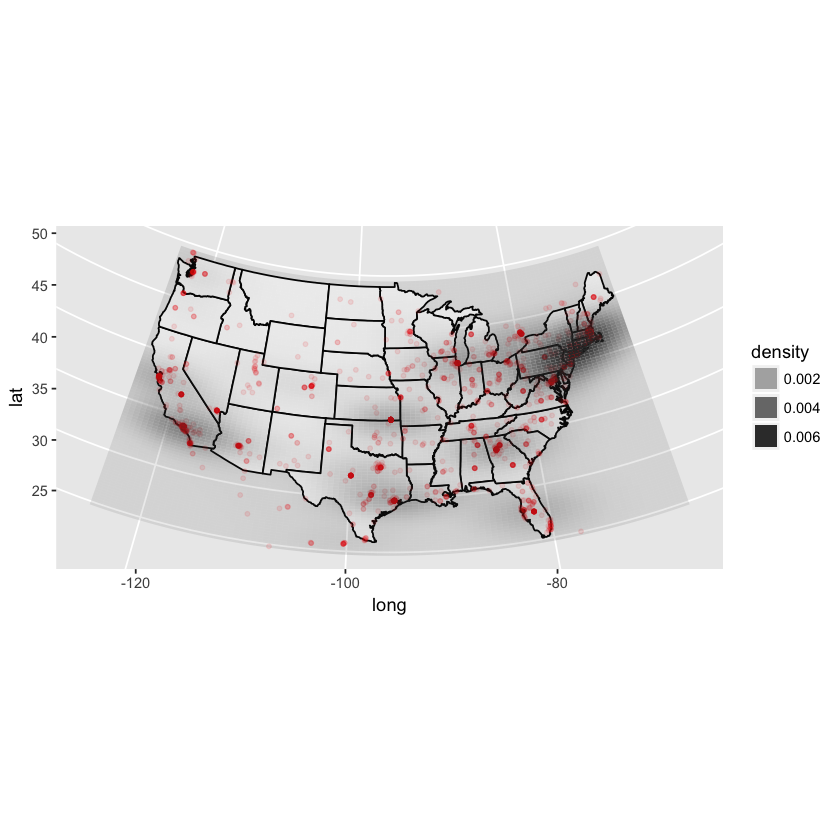

In [14]:
USlocation <- subset(location,lat>=24.396308 & lat<=49.384358 & lon>=-124.848974 & lon<=-66.885444)
state_map <- map_data("state")
map<-ggplot() + 
  geom_polygon(data = state_map, aes(x=long,y=lat,group=group), colour = "black", fill = "white") +
  coord_map("albers",lat0=39, lat1=45) +
  geom_point(data=USlocation, aes(x=lon, y=lat), alpha=0.1, size=1, col="red") +
  #stat_density2d(data= USlocation, aes(x = lon, y = lat, alpha=.75,fill=..level..),bins = 10)
  stat_density2d(data=USlocation, aes(x=lon,y=lat,alpha=..density..),size=2,bins=5,geom="tile",contour=FALSE)

map